In [1]:
from tools import *
from omegaconf import OmegaConf
from pprint import PrettyPrinter
from models._main import get_model
from models._utils import print_parameters

sns.set_style("whitegrid")
pp = PrettyPrinter(indent=4, width=100, compact=True)

CUDA device found.


# Color and Marker code

*Returns the legend code that is used across all plots.*

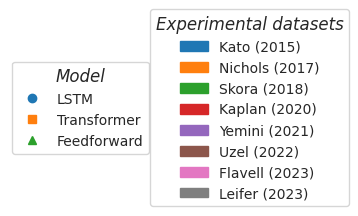

{   'color_legend': [   <matplotlib.patches.Patch object at 0x1478f1d0daf0>,
    'dataset_labels': [   'Kato (2015)', 'Nichols (2017)', 'Skora (2018)', 'Kaplan (2020)',
                          'Yemini (2021)', 'Uzel (2022)', 'Flavell (2023)', 'Leifer (2023)'],
    'ds_color_code': {   'Flavell': (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
                         'Kaplan': (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
                         'Kato': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
                         'Leifer': (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
                         'Nichols': (1.0, 0.4980392156862745, 0.054901960784313725),
                         'Skora': (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
                         'Uzel': (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
                         'Yemini': (0.5803921568627451, 0.4039215686

In [2]:
leg_code = legend_code()
pp.pprint(leg_code)

# Model Parameters

In [3]:
model_config = OmegaConf.load("../../configs/submodule/model.yaml")
model_config.model.use_this_pretrained_model = None
model = get_model(model_config.model)
print_parameters(model, verbose=True)

+-----------------------------+------------+-----------+
|            Module           | Parameters | Trainable |
+-----------------------------+------------+-----------+
|    input_hidden.0.weight    |   154624   |    True   |
|     input_hidden.0.bias     |    512     |    True   |
|    input_hidden.2.weight    |    512     |    True   |
|     input_hidden.2.bias     |    512     |    True   |
| hidden_hidden.ffwd.0.weight |   262144   |    True   |
|  hidden_hidden.ffwd.0.bias  |    512     |    True   |
|        linear.weight        |   154624   |    True   |
|         linear.bias         |    302     |    True   |
+-----------------------------+------------+-----------+
Total Parameters: 573742
Total Trainable Parameters: 573742


(573742, 573742)

# Dataset information

*Plot information from datasets. I'm loading information from datasets that used all available worms and neurons in the analysis (in this case, the data scaling experiment datasets, that used the maximum amount of data)*

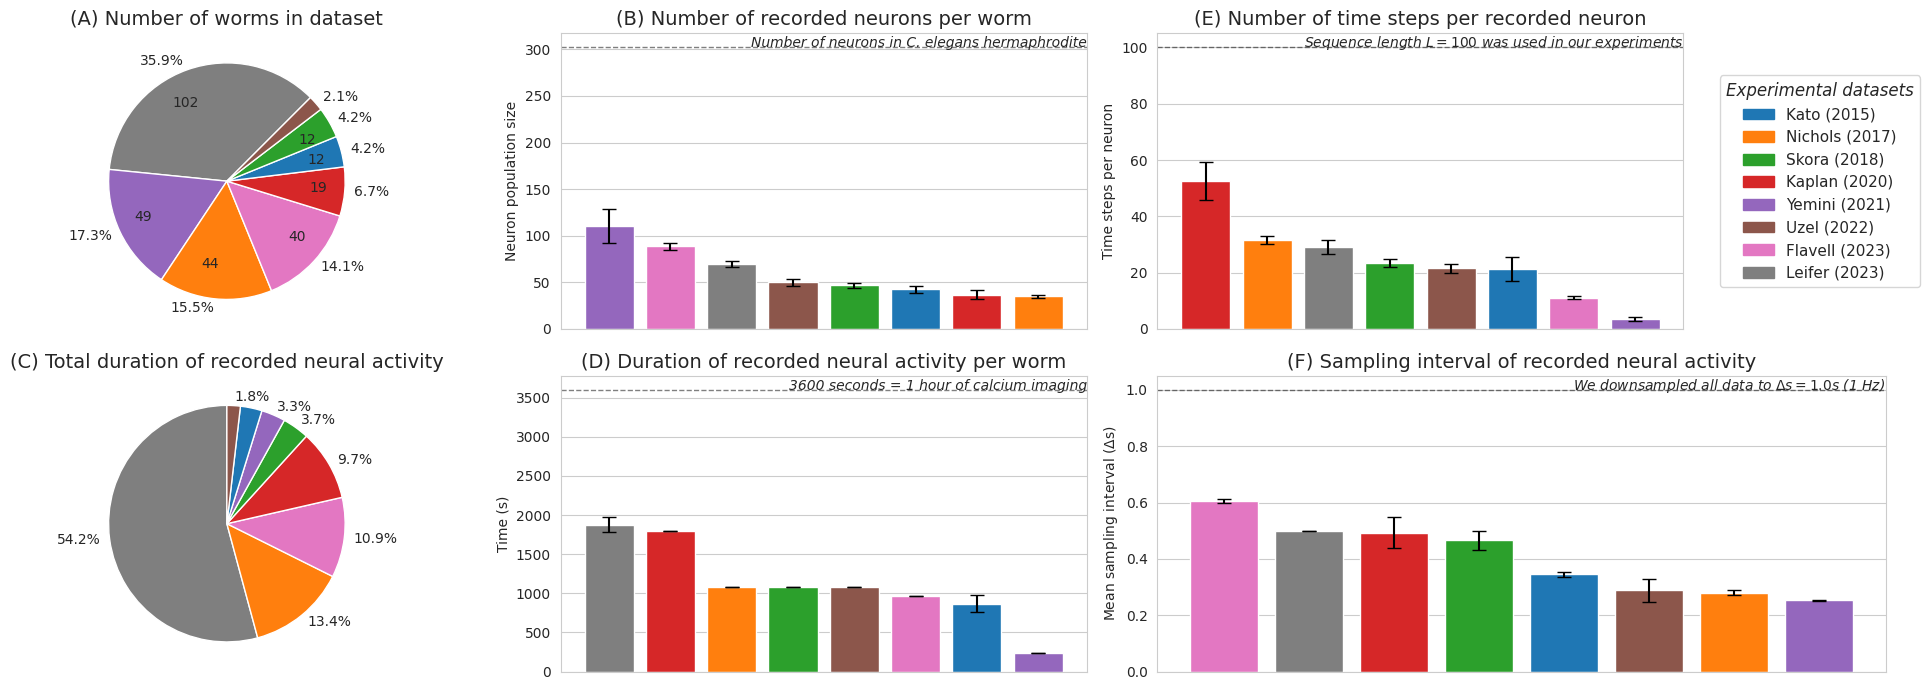

In [4]:
fig1_path_dict = {
    "train_dataset_info": "/om2/user/qsimeon/worm-graph/data/train_AllExperimental/train_dataset_info.csv",  # Path to train dataset info => extract number of train time steps
    "val_dataset_info": "/om2/user/qsimeon/worm-graph/data/validation_AllExperimental/val_dataset_info.csv",  # Path to val. dataset info => extract number of val. time steps
    "combined_dataset_info": "/om2/user/qsimeon/worm-graph/data/combined_AllExperimental/combined_dataset_info.csv",  # Path to combined dataset info => extract total number of worms and time step interval
}

# NOTE: Error bars on bar plots show +/- 2 SEM
dataset_info = dataset_information(path_dict=fig1_path_dict, legend_code=leg_code)

# Data scaling

In [5]:
# Specify path to where results are stored for this experiment
results_dir = "/om2/vast/yanglab/shared/qsimeon/worm-graph-experiments/num_time_steps/experimental"

nts_experiments = {
    "Feedforward": [  # Feedforward trials
        os.path.join(results_dir, "seed_1/2023_11_27_12_42_34"),
        # os.path.join(results_dir, "seed_2/2023_11_22_19_42_25"),
        # os.path.join(results_dir, "seed_3/2023_11_20_23_26_21"),
        # os.path.join(results_dir, "seed_4/2023_11_21_14_01_22"),
    ],
    "Transformer": [  # Transformer trials
        os.path.join(results_dir, "seed_1/2023_11_27_12_47_28"),
        # os.path.join(results_dir, "seed_2/2023_11_24_15_08_35"),
        # os.path.join(results_dir, "seed_3/2023_11_24_15_11_19"),
        # os.path.join(results_dir, "seed_4/2023_11_24_15_13_47"),
    ],
    "LSTM": [  # LSTM trials
        os.path.join(results_dir, "seed_1/2023_11_27_12_45_46"),
        # os.path.join(results_dir, "seed_2/2023_11_22_19_43_14"),
        # os.path.join(results_dir, "seed_3/2023_11_20_23_26_49"),
        # os.path.join(results_dir, "seed_4/2023_11_21_14_02_12"),
    ],
}

# Retrieve the relevant results
data_results = data_scaling_df(nts_experiments)

# Building the DataFrame took ~24s on OpenMind cluster
data_results

,experiment_ID,model_type,hidden_size,num_parameters,num_worms,num_time_steps,time_steps_per_neuron,num_named_neurons,min_val_loss,val_baseline
0,exp0,FeatureFFNN,512,573742,5,2845,9.702703,35,0.872872,0.010482
1,exp1,FeatureFFNN,512,573742,10,6539,13.781878,40,0.543132,0.010482
2,exp12,FeatureFFNN,512,573742,65,44054,11.468085,41,0.083194,0.010482
3,exp13,FeatureFFNN,512,573742,70,38617,8.826316,41,0.089053,0.010482
4,exp14,FeatureFFNN,512,573742,75,46976,9.862745,41,0.072864,0.010482
...,...,...,...,...,...,...,...,...,...,...
157,exp55,NetworkLSTM,232,573574,280,175569,11.229167,41,0.010010,0.010482
158,exp6,NetworkLSTM,232,573574,35,21094,9.702703,39,0.205479,0.010482
159,exp7,NetworkLSTM,232,573574,40,26956,10.805941,41,0.155227,0.010482
160,exp8,NetworkLSTM,232,573574,45,26618,9.694737,41,0.168740,0.010482


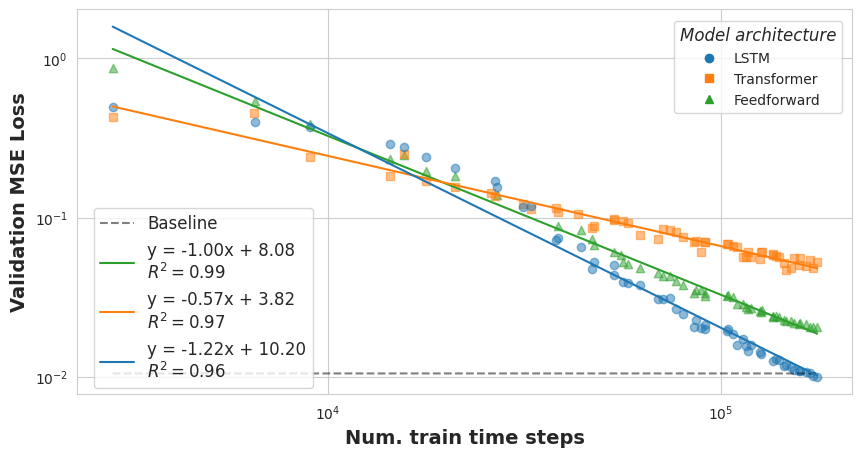

In [6]:
data_scaling_plot(data_results, legend_code=leg_code)

In [7]:
scaling_slope_results = scaling_slopes_df(nts_experiments)

scaling_slope_results

,experiment_ID,model_type,validation_dataset,individual_validation_loss,individual_baseline_loss,num_parameters,num_worms,num_time_steps,min_val_loss,val_baseline
0,exp0,FeatureFFNN,Kato2015,0.669759,0.013651,573742,5,2845,0.872872,0.010482
1,exp0,FeatureFFNN,Nichols2017,0.598760,0.010331,573742,5,2845,0.872872,0.010482
2,exp0,FeatureFFNN,Skora2018,0.719331,0.007510,573742,5,2845,0.872872,0.010482
3,exp0,FeatureFFNN,Uzel2022,1.131861,0.007564,573742,5,2845,0.872872,0.010482
4,exp0,FeatureFFNN,Yemini2021,1.023185,0.010871,573742,5,2845,0.872872,0.010482
...,...,...,...,...,...,...,...,...,...,...
1291,exp9,NetworkLSTM,Uzel2022,0.219565,0.007564,573574,50,31436,0.116598,0.010482
1292,exp9,NetworkLSTM,Yemini2021,0.170808,0.010871,573574,50,31436,0.116598,0.010482
1293,exp9,NetworkLSTM,Kaplan2020,0.077206,0.003506,573574,50,31436,0.116598,0.010482
1294,exp9,NetworkLSTM,Flavell2023,0.111467,0.008092,573574,50,31436,0.116598,0.010482


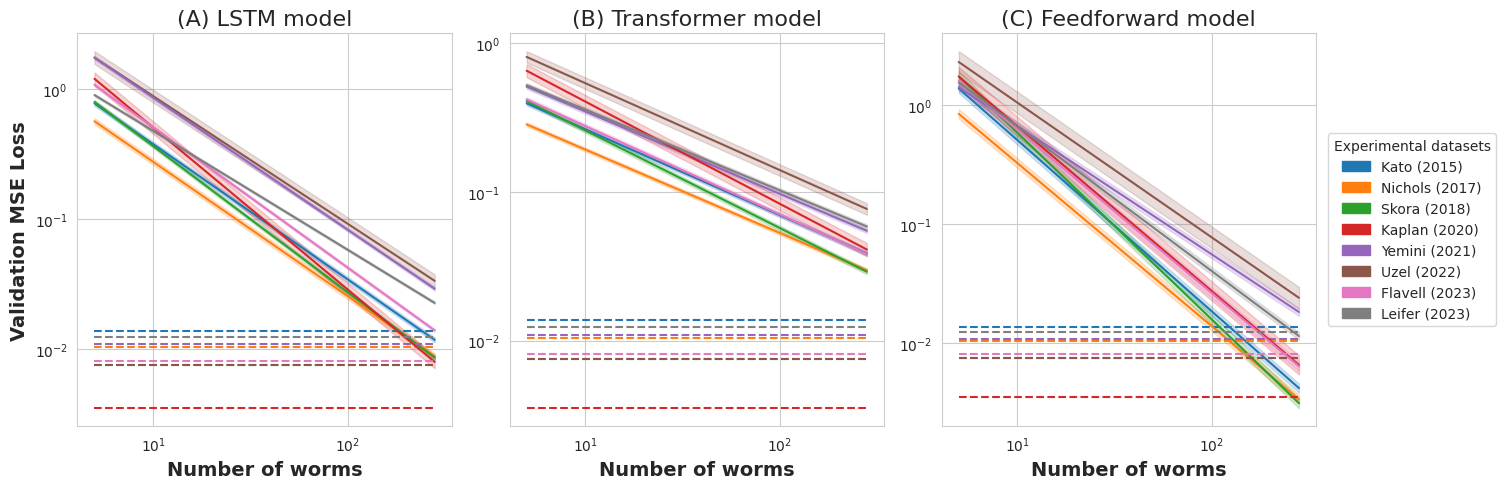

In [8]:
scaling_slopes_plot(scaling_slope_results, legend_code=leg_code)

# Number of Parameters Scaling

In [7]:
# Instead of plotting against the hidden size, plot against the number of parameters.
# The hidden size is simply the "knob" that we turn (i.e. the variable), but simply as way to vary the number of parameters.

# Specify path to where results are stored for this experiment
results_dir = "/om2/vast/yanglab/shared/qsimeon/worm-graph-experiments/num_parameters/experimental"

size_experiments = {
    "Feedforward": [  # Feedforward trials
        os.path.join(results_dir, "seed_1/2023_11_23_00_00_58"),
        # os.path.join(results_dir, "seed_2/2023_11_22_19_42_25"),
        # os.path.join(results_dir, "seed_3/2023_11_20_23_26_21"),
        # os.path.join(results_dir, "seed_4/2023_11_21_14_01_22"),
    ],
    "Transformer": [  # Transformer trials
        os.path.join(results_dir, "seed_1/2023_11_24_23_35_38"),
        # os.path.join(results_dir, "seed_2/2023_11_24_15_08_35"),
        # os.path.join(results_dir, "seed_3/2023_11_24_15_11_19"),
        # os.path.join(results_dir, "seed_4/2023_11_24_15_13_47"),
    ],
    "LSTM": [  # LSTM trials
        os.path.join(results_dir, "seed_1/2023_11_23_00_02_00"),
        # os.path.join(results_dir, "seed_2/2023_11_22_19_43_14"),
        # os.path.join(results_dir, "seed_3/2023_11_20_23_26_49"),
        # os.path.join(results_dir, "seed_4/2023_11_21_14_02_12"),
    ],
}

# Retrieve the relevant results
size_results = data_scaling_df(size_experiments)

# Building the DataFrame took ~24s on OpenMind cluster
size_results

,experiment_ID,model_type,hidden_size,num_parameters,num_worms,num_time_steps,time_steps_per_neuron,num_named_neurons,min_val_loss,val_baseline
0,exp0,LinearNN,16,10286,284,176402,11.0,41,0.313382,0.010482
1,exp1,LinearNN,32,20782,284,176402,11.0,41,0.229544,0.010482
2,exp2,LinearNN,48,31790,284,176402,11.0,41,0.172770,0.010482
3,exp3,LinearNN,64,43310,284,176402,11.0,41,0.132743,0.010482
4,exp4,LinearNN,80,55342,284,176402,11.0,41,0.100653,0.010482
5,exp5,LinearNN,96,67886,284,176402,11.0,41,0.075798,0.010482
6,exp6,LinearNN,112,80942,284,176402,11.0,41,0.055852,0.010482
7,exp7,LinearNN,128,94510,284,176402,11.0,41,0.040958,0.010482
8,exp0,NeuralTransformer,16,11678,284,176402,11.0,41,0.318204,0.010482
9,exp1,NeuralTransformer,32,26126,284,176402,11.0,41,0.247917,0.010482


In [ ]:
hidden_scaling_plot(size_results, legend_code=leg_code)

# Data scaling slopes

*Data scaling slopes plot. To generate the dataframe with the relevant results, firstly for each model you want to plot, you need to furnish the paths for each trial (it can take some minutes). Then you can call the plot function to obtain a graphic with mean and standard deviation bars. You need to provide the legend code for color standardization.*

*To create this plot, after a model has been trained (with a given amount of data), we validate it on individual experimental datasets. We then make a plot for each model by experimental dataset.*

In [ ]:
nts_experiments = {
    "LSTM": [
        os.path.join("results", "NTS_LSTM"),  # LSTM trial 1
        os.path.join("results", "NTS_LSTM_1"),  # LSTM trial 2
        os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 3
    ],
    "Transformer": [
        os.path.join("results", "NTS_TRANSFORMER"),  # Transformer trial 1
        os.path.join("results", "NTS_TRANSFORMER_1"),  # Transformer trial 2
        os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 3
    ],
    "Feedforward": [
        os.path.join("results", "NTS_LINEAR"),  # Linear trial 1
        os.path.join("results", "NTS_LINEAR_1"),  # Linear trial 2
        os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 3
    ],
}

scaling_slope_results = scaling_slopes_df(nts_experiments)  # Took ~10s
scaling_slope_results.head(2)

In [ ]:
scaling_slopes_plot(scaling_slope_results, legend_code=leg_code)

# Cross-dataset Generalization

*This function automatically loads the results from the indicated experiments and displays a heatmap plot showing the validation loss on individual experimental datasets after a model has been trained (from scratch) using a single experimental dataset.*

*You need to specify the model names respective to each experiment and also the legend color code.*

In [ ]:
experiment_log_folders = [
    os.path.join("results", "CDS_LSTM"),  # LSTM trial 1
    os.path.join("results", "CDS_TRANSFORMER"),  # Transformer trial 1
    os.path.join("results", "CDS_LINEAR"),  # Linear trial 1
]

model_names = ["LSTM", "Transformer", "Feedforward"]

cross_dataset(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
)

# Predictions

*Load and plot the predictions for the same neuron across different datasets. You need to determine which neurons are common to all datasets (I did it manually).*

In [ ]:
experiment_log_folders = [
    os.path.join("results", "NTS_LSTM_2"),  # LSTM trial 1
    os.path.join("results", "NTS_TRANSFORMER_2"),  # Transformer trial 1
    os.path.join("results", "NTS_LINEAR_2"),  # Linear trial 1
]

model_names = ["LSTM", "Transformer", "Linear"]

ds_type = "val"  # we are plotting the predictions using the validation dataset (data never seen during training, second split)
exp = "exp5"  # model trained with maximum amount of data (best model to use for predictions)
neuron_to_plot = "AVER"  # neuron we want to plot

teacher_forcing(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

In [ ]:
autoregressive(
    experiment_log_folders=experiment_log_folders,
    model_names=model_names,
    legend_code=leg_code,
    ds_type=ds_type,
    exp=exp,
    neuron_to_plot=neuron_to_plot,
)

# (Sup. fig) Prediction gap

*Loads the relevant results and plots the refinement of the prediction plot as the amount of training data for the LSTM model increases.*

In [ ]:
pred_gap_df = prediction_gap(
    exp_nts_log_dir=os.path.join("results", "NTS_LSTM_1"),
    legend_code=leg_code,
    neuronID="AVER",
    wormID="worm1",
    datasetID="Flavell2023",
)